In [1]:
#Primero crear una red
#Recuperar el número de followers y ver la red de followers
import tweepy
from twitter_secrets import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=False)

In [2]:
user = api.get_user('telecos_rioja')
user_yo = api.get_user('jecrespom')

In [3]:
followers = api.followers_ids(user.id)
followers_yo = api.followers_ids(user_yo.id)

In [4]:
print(len(followers))
print(len(followers_yo))

369
2599


In [5]:
#Lista de followers
followers

[106205259,
 1139204651964882950,
 706822056353075200,
 2148526397,
 1129014955,
 189292089,
 1428028338,
 154095375,
 2587683356,
 1250400933865033728,
 60887027,
 1141602271161212928,
 2464828090,
 558758155,
 851283070233726977,
 1247988763155992576,
 1166050967248355328,
 3854742142,
 1245460608616747010,
 1218949928065687552,
 1238828127423512576,
 372187567,
 1173624533636583424,
 1205920234516942856,
 887644903077019648,
 1064107576349130752,
 276898155,
 747720473304309762,
 1269513930,
 782912225245859840,
 115416310,
 2922126755,
 4172562339,
 1049937491992690688,
 1095426013822095361,
 399554959,
 4863651155,
 834839652766986240,
 1169240692977209345,
 1213524522927710214,
 1157661313801367552,
 1032089070,
 494077888,
 2228102378,
 1149107161,
 981157426069164032,
 47092888,
 163816969,
 1103400885475004416,
 235713095,
 821439972645498883,
 251694598,
 719147860852416512,
 242810619,
 264162413,
 33851918,
 2387344939,
 1026031351697432576,
 4846612870,
 765164993599995904

In [6]:
thinktic_followers = api.followers_ids("thinktic")
len(thinktic_followers)
parent = api.get_user('thinktic')
followers_d = {}

In [7]:
parent

User(_api=<tweepy.api.API object at 0x7f8b6a52f3d0>, _json={'id': 85380154, 'id_str': '85380154', 'name': 'Thinktic', 'screen_name': 'Thinktic', 'location': 'La Rioja (Spain)', 'profile_location': None, 'description': 'Centro Nacional de Formación en Nuevas Tecnologias  - ThinkTic', 'url': 'http://t.co/VNrENEt17J', 'entities': {'url': {'urls': [{'url': 'http://t.co/VNrENEt17J', 'expanded_url': 'http://www.larioja.org/thinktic', 'display_url': 'larioja.org/thinktic', 'indices': [0, 22]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3001, 'friends_count': 453, 'listed_count': 203, 'created_at': 'Mon Oct 26 18:31:35 +0000 2009', 'favourites_count': 401, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 4648, 'lang': None, 'status': {'created_at': 'Fri Jun 05 11:50:40 +0000 2020', 'id': 1268872865681682433, 'id_str': '1268872865681682433', 'text': 'La inteligencia artificial presente en dos originales casos) https://t

In [ ]:
for follower_id in thinktic_followers:
    if follower_id in followers_d:
        print(f'El usuario {follower_id} ya se ha descargado')
        continue
    try:
        followers=api.followers_ids(follower_id)
        followers_d[follower_id] = followers
    except tweepy.TweepError as e:
        if 'Not Authorized' in str(e):
            print(f'El usuario {follower_id} no nos deja acceder a sus datos')
        else:
            print(e)
            break
        
    

In [ ]:
followers_d

In [ ]:
len(followers_d)

In [ ]:
datos = []
for user_id in followers_d:
    for follower_id in followers_d[user_id]:
        enlace={'orig':user_id,
               'dest':follower_id}
        datos.append(enlace)
        print(user_id,follower_id)

In [ ]:
len(datos)

In [34]:
import networkx

In [35]:
import pandas as pd
df = pd.DataFrame(datos)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   orig    10152 non-null  int64
 1   dest    10152 non-null  int64
dtypes: int64(2)
memory usage: 158.8 KB


In [37]:
df.to_csv('grafo_mio.csv',sep=' ',index=False,header=False)

In [38]:
#en grafo.csv tengo todas las relaciones que hay con gephy
%pip install -U networkx

Requirement already up-to-date: networkx in /Users/ecrespo/opt/anaconda3/lib/python3.7/site-packages (2.4)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import networkx as nx

In [12]:
G_tw = nx.read_edgelist('grafo_mio.csv',create_using=nx.Graph(),nodetype=int)

In [13]:
print(nx.info(G_tw))

Name: 
Type: Graph
Number of nodes: 10153
Number of edges: 10152
Average degree:   1.9998


In [14]:
nx.density(G_tw)

0.00019698611247907023

In [15]:
#no dirigido
nx.Graph()
#Grafo dirigido
nx.DiGraph()
#grafo no dirigido con múltiples conexiones entre dos nodos
nx.MultiGraph()
#grafo dirigido con múltiples conexiones entre dos nodos
nx.MultiDiGraph()

In [16]:
bt = nx.betweenness_centrality(G_tw)

In [17]:
bt

{735106736332410880: 0.7385986769209677,
 306433482: 0.0,
 1208012907876884480: 0.0,
 350956520: 0.0,
 995698400111857664: 0.0,
 1472482676: 0.0,
 1247892002680623106: 0.0,
 1265634552678019077: 0.0,
 1247226795289489408: 0.0,
 950690984236523520: 0.0,
 1061661999463944192: 0.0,
 3864158913: 0.0,
 1056223391135358976: 0.0,
 1058162469389033472: 0.0,
 1264978476571873280: 0.0,
 1230504550877913088: 0.0,
 949443772957392896: 0.0,
 1213222463531700225: 0.0,
 1265197095360716802: 0.0,
 1213522940416774144: 0.0,
 1210714677317111808: 0.0,
 20820771: 0.0,
 1222079035422855170: 0.0,
 1264914340110577665: 0.0,
 956487917337128960: 0.0,
 753642644903985152: 0.0,
 39779779: 0.0,
 2340190548: 0.0,
 1315719794: 0.0,
 1264098659026604033: 0.0,
 1248287443930902529: 0.0,
 1247878454889951232: 0.0,
 1247230698777239555: 0.0,
 1254400657043283968: 0.0,
 1192354558938238977: 0.0,
 1264600733254586368: 0.0,
 1456840320: 0.0,
 1205769681006710784: 0.0,
 1074960226502074368: 0.0,
 1157091579255054336: 0.0

In [18]:
%pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


In [19]:
import community

In [20]:
parts = community.best_partition(G_tw)

In [21]:
parts

{735106736332410880: 0,
 306433482: 0,
 1208012907876884480: 0,
 350956520: 0,
 995698400111857664: 0,
 1472482676: 0,
 1247892002680623106: 0,
 1265634552678019077: 0,
 1247226795289489408: 0,
 950690984236523520: 0,
 1061661999463944192: 0,
 3864158913: 0,
 1056223391135358976: 0,
 1058162469389033472: 0,
 1264978476571873280: 0,
 1230504550877913088: 0,
 949443772957392896: 0,
 1213222463531700225: 0,
 1265197095360716802: 0,
 1213522940416774144: 0,
 1210714677317111808: 0,
 20820771: 0,
 1222079035422855170: 0,
 1264914340110577665: 0,
 956487917337128960: 0,
 753642644903985152: 0,
 39779779: 0,
 2340190548: 0,
 1315719794: 0,
 1264098659026604033: 0,
 1248287443930902529: 0,
 1247878454889951232: 0,
 1247230698777239555: 0,
 1254400657043283968: 0,
 1192354558938238977: 0,
 1264600733254586368: 0,
 1456840320: 0,
 1205769681006710784: 0,
 1074960226502074368: 0,
 1157091579255054336: 0,
 1263545596079738881: 0,
 901161967154417664: 0,
 1185641805662044160: 0,
 126278192509947904

In [36]:
communities=set(parts.values()) #conjunto se usa para convertir una lista de valores en una lista de valores únicos

In [37]:
members = {c:[] for c in communities}
for id, c in parts.items():
    members[c].append(id)

In [38]:
for c, m in members.items():
    print(f'Comunidad {c}: {len(m)} elemtos')

Comunidad 0: 5000 elemtos
Comunidad 1: 65 elemtos
Comunidad 2: 51 elemtos
Comunidad 3: 4998 elemtos
Comunidad 4: 39 elemtos


In [39]:
colores = [parts[n] for n in G_tw.nodes()]

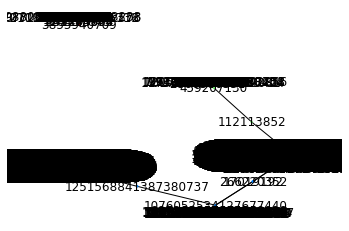

In [43]:
import matplotlib.pyplot as plt
plt.axis('off')
spring_pos = nx.spring_layout(G_tw)
nx.draw_networkx(G_tw,pos=spring_pos,cmap=plt.get_cmap('jet'),node_color=colores,node_size=2,with_label=False)

In [44]:
#si lo hacemos con nuestros seguidores podríamos ver que seguidores son más importantes